# Lab 1-2. Linear Regression

*   Regression: input data x를 output data y로 매핑하는 모델 f를 찾는것.
*   Linear Regression: 모델 f가 linear model, 즉 f(x)=wx+b



### Load File from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file = open('/content/drive/MyDrive/Colab Notebooks/data/regression_data.txt','r')  # open the file with read-only
text = file.readlines()  # read all line texts
file.close()  # close the file

x_data = []
y_data = []

# convert to float
for s in text:
    data = s.split()
    x_data.append(float(data[0]))
    y_data.append(float(data[1]))    

import numpy as np
# convert to numpy-array
x_data = np.asarray(x_data, dtype=np.float32)
y_data = np.asarray(y_data, dtype=np.float32)
print(x_data)
print("shape of input data: ", x_data.shape)
print("shape of output data: ", y_data.shape)

[ 7.3441051e-02 -6.6713613e-01  6.1102557e-01 -9.8457748e-01
 -8.8374341e-01 -1.2854759e-01  2.2099136e-01  8.5341275e-01
  6.2423694e-01 -9.8844820e-01 -1.9720629e-01  4.0892109e-01
  3.0833441e-01 -7.6836628e-01  5.8100939e-01 -6.1304229e-01
  3.7080780e-01  2.6891464e-01  6.9203086e-02  2.5825354e-01
  6.4607662e-01  6.0437866e-02 -1.5156314e-01 -9.3005890e-01
  3.6524642e-02  6.3047481e-01 -7.5167410e-02 -3.1744266e-01
 -5.3076965e-01  8.3253920e-01 -5.3779191e-01  4.1861799e-01
  1.6230159e-01  2.2209007e-01 -5.5525887e-01  4.7212458e-01
  7.5296754e-01  7.4156272e-01  8.8291490e-01  8.0603629e-01
  7.6833248e-02 -4.2412542e-02  5.2968591e-01  3.7602361e-04
  2.6242265e-01 -3.8045511e-01  9.1139627e-01  1.8302149e-01
  6.6523778e-01  2.4621025e-01 -7.6559383e-01  1.2891646e-01
  5.9750515e-01  6.1327022e-01 -3.2857987e-01  3.5673860e-01
  1.8313417e-02  6.3740879e-01 -5.0839418e-01 -3.7981966e-01
 -7.8948051e-01 -1.2078243e-01 -9.5302850e-01 -3.1137064e-01
 -4.9128255e-01  8.08997

### Plot data

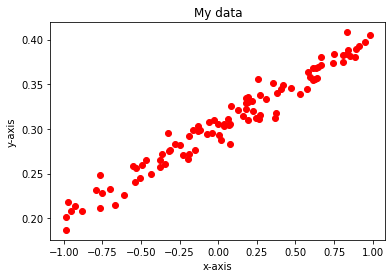

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1)
plt.plot(x_data, y_data, 'ro') # plot data

plt.xlabel('x-axis')  
plt.ylabel('y-axis')
plt.title('My data')

plt.show()

### Closed Form Linear Regression

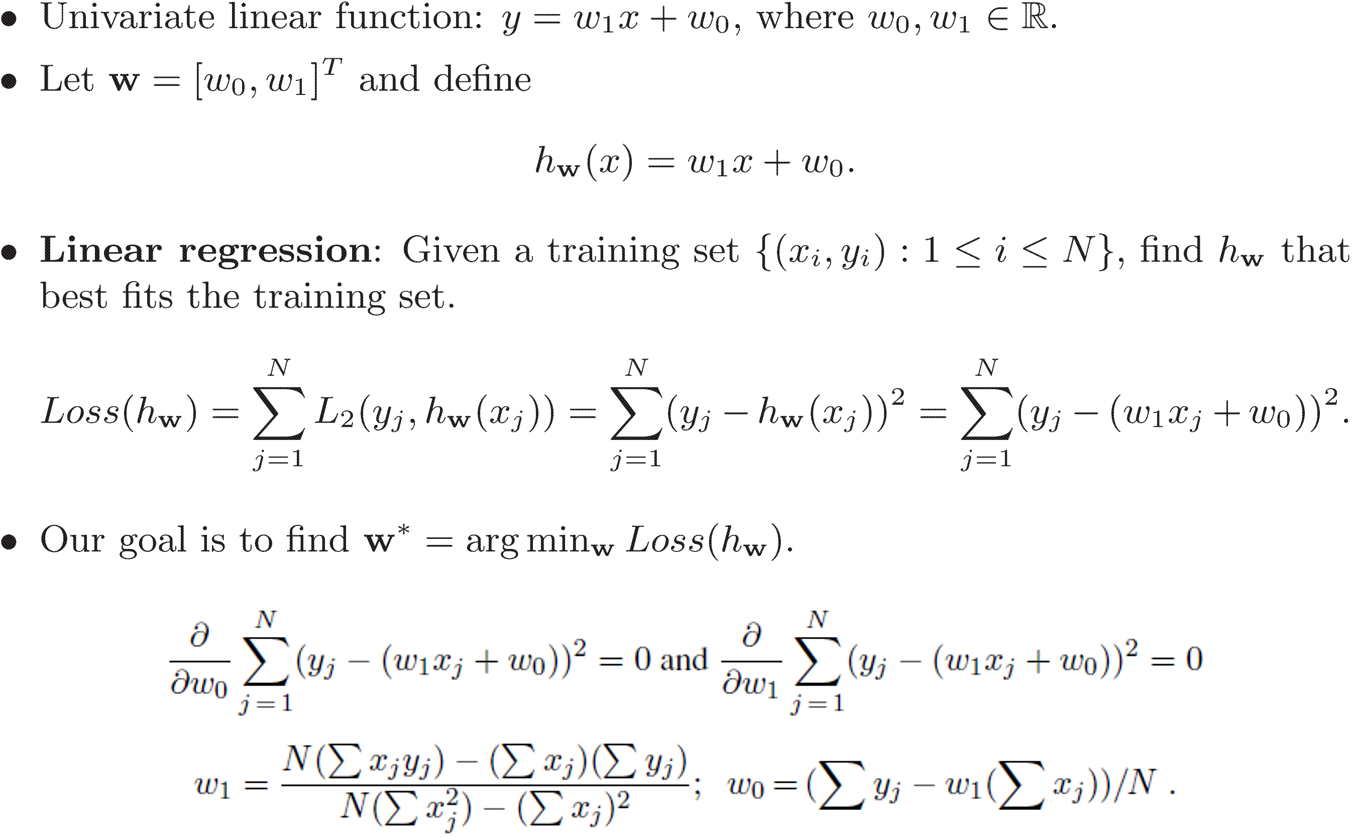

In [ ]:
N = len(x_data) # the size of data

sum_of_x = np.sum(x_data)
sum_of_x_square = np.sum(x_data * x_data)
sum_of_y = np.sum(y_data)
sum_of_xy = np.sum(x_data * y_data)

a = (N * sum_of_xy - sum_of_x * sum_of_y ) / (N * sum_of_x_square - sum_of_x ** 2) 
b = (sum_of_y - a * sum_of_x) / N

print ('a : {}'.format(a))
print ('b : {}'.format(b))

a : 0.09899378873058774
b : 0.3020929764555586


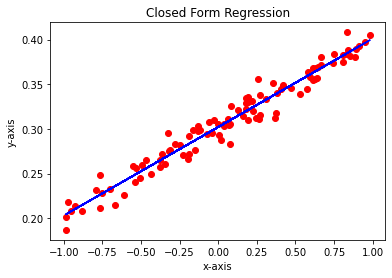

In [ ]:
plt.figure(2)

y_regression = a * x_data + b

plt.plot(x_data, y_data, 'ro')
plt.plot(x_data, y_regression, 'b')

plt.xlabel('x-axis')  
plt.ylabel('y-axis')
plt.title('Closed Form Regression')

plt.show()

### Gradient Descent로 Linear Regression (PyTorch 맛보기)

만약 Closed-form solution이 없는 경우, 혹은 데이터가 너무 많거나 계산이 매우 복잡하여 정답을 구하기 힘든 경우에는?
- 경사하강법 (gradient descent) 이용
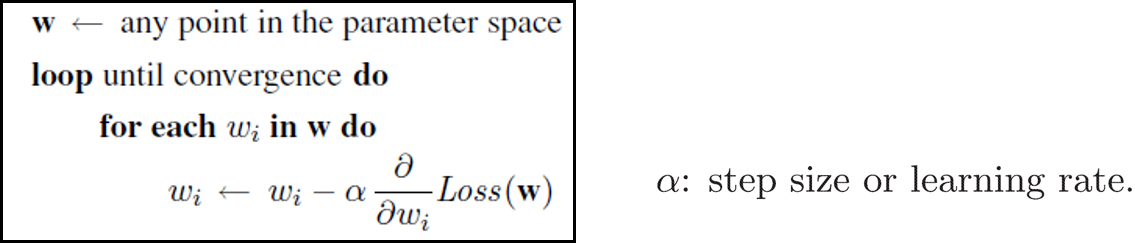

PyTorch 패키지를 이용하면 미분을 직접할 필요 없이
Loss를 정의, Gradient를 계산, weight를 update까지 해줄 수 있습니다!

In [ ]:
import torch
import torch.nn as nn

In [ ]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 100
learning_rate = 0.1


In [ ]:
# Linear regression model, y = Wx+b
model = nn.Linear(input_size, output_size) 

In [ ]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [ ]:
print(x_data.shape, y_data.shape)
if len(x_data.shape)==1 and len(y_data.shape)==1:
  x_data = np.expand_dims(x_data, axis=-1) #마지막 axis를 추가하여 차원을 늘려줌
  y_data = np.expand_dims(y_data, axis=-1)
print(x_data)
print(x_data.shape, y_data.shape)

(100, 1) (100, 1)
[[ 7.3441051e-02]
 [-6.6713613e-01]
 [ 6.1102557e-01]
 [-9.8457748e-01]
 [-8.8374341e-01]
 [-1.2854759e-01]
 [ 2.2099136e-01]
 [ 8.5341275e-01]
 [ 6.2423694e-01]
 [-9.8844820e-01]
 [-1.9720629e-01]
 [ 4.0892109e-01]
 [ 3.0833441e-01]
 [-7.6836628e-01]
 [ 5.8100939e-01]
 [-6.1304229e-01]
 [ 3.7080780e-01]
 [ 2.6891464e-01]
 [ 6.9203086e-02]
 [ 2.5825354e-01]
 [ 6.4607662e-01]
 [ 6.0437866e-02]
 [-1.5156314e-01]
 [-9.3005890e-01]
 [ 3.6524642e-02]
 [ 6.3047481e-01]
 [-7.5167410e-02]
 [-3.1744266e-01]
 [-5.3076965e-01]
 [ 8.3253920e-01]
 [-5.3779191e-01]
 [ 4.1861799e-01]
 [ 1.6230159e-01]
 [ 2.2209007e-01]
 [-5.5525887e-01]
 [ 4.7212458e-01]
 [ 7.5296754e-01]
 [ 7.4156272e-01]
 [ 8.8291490e-01]
 [ 8.0603629e-01]
 [ 7.6833248e-02]
 [-4.2412542e-02]
 [ 5.2968591e-01]
 [ 3.7602361e-04]
 [ 2.6242265e-01]
 [-3.8045511e-01]
 [ 9.1139627e-01]
 [ 1.8302149e-01]
 [ 6.6523778e-01]
 [ 2.4621025e-01]
 [-7.6559383e-01]
 [ 1.2891646e-01]
 [ 5.9750515e-01]
 [ 6.1327022e-01]
 [-3.28579

In [ ]:
# Train the model
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(x_data)
    targets = torch.from_numpy(y_data)

    # Predict outputs with the linear model.
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # compute gradients and update
    optimizer.zero_grad()
    loss.backward() #미분
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

RuntimeError: ignored

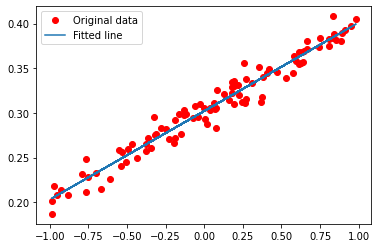

In [ ]:
# Plot the graph
predicted = model(torch.from_numpy(x_data)).detach().numpy()
plt.plot(x_data, y_data, 'ro', label='Original data')
plt.plot(x_data, predicted, label='Fitted line')
plt.legend()
plt.show()

## HW1
데이터셋의 크기가 1/10이 되었을때도 gradient descent를 이용한 linear regression이 잘 동작하는지 강의에서 배운 k-fold cross validation (k=5)을 활용해서 확인해보세요. 
그리고 데이터셋의 크기가 원래 사이즈였을 때도 똑같이 k-fold cross validation (k=5)를 진행해서 두 경우의 validation loss (k round의 평균 test loss)를 비교해보세요.

###참고사항
1.   위에 주어진 코드에서는 학습 방법에 초점이 맞춰져 test set이 따로 없었지만, 실제로 학습을 진행할때는 validation set이나 test set을 통해 성능을 확인하는 것이 필수적입니다!
2.   전체 데이터를 k개의 부분집합으로 나누기 위해서 아래와 같은 sklearn 라이브러리의 KFold 클래스를 사용해도 되지만,
```
from sklearn.model_selection import KFold
```
연습을 위해서 Lab 1-1에서 배운 Slicing을 통해서 데이터셋을 k개로 나누고
k round의 learning을 진행해주세요.





In [ ]:
file = open('/content/drive/MyDrive/Colab Notebooks/data/regression_data.txt','r')  # open the file with read-only
text = file.readlines()  # read all line texts
file.close()  # close the file

x_data_ten = []
y_data_ten = []

# convert to float
for idx,s in enumerate(text):
    if idx%10==0:

      data = s.split()
      print(data[0])
      x_data_ten.append(float(data[0]))

      y_data_ten.append(float(data[1]))    

# convert to numpy-array
x_data_ten = np.asarray(x_data_ten, dtype=np.float32)
y_data_ten = np.asarray(y_data_ten, dtype=np.float32)


0.07344104893026171
0.07344104893026171
-0.19720628238168114
0.07344104893026171
0.646076592630676
0.07344104893026171
-0.5377918900681617
0.07344104893026171
0.07683324784802203
0.07344104893026171
-0.7655938018983295
0.07344104893026171
-0.7894805225544625
0.07344104893026171
0.26819021337722804
0.07344104893026171
-0.4674718628893888
0.07344104893026171
0.8320151074446431
0.07344104893026171


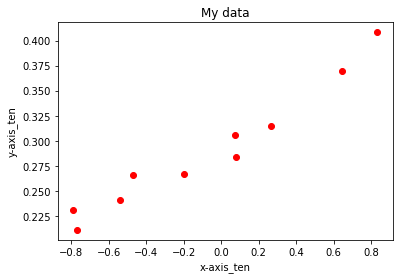

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1)
plt.plot(x_data_ten, y_data_ten, 'ro') # plot data

plt.xlabel('x-axis_ten')  
plt.ylabel('y-axis_ten')
plt.title('My data')

plt.show()

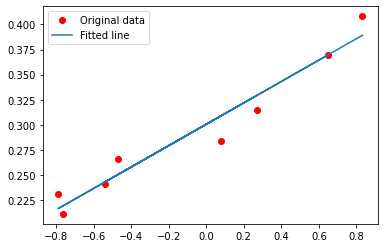

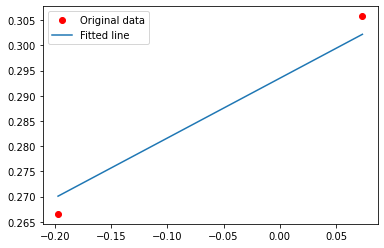

2.0337059158919146e-05


In [ ]:
# new_[0] 을 test set으로 가정! 즉 new_x[1~4]를 training set으로 사용

# x 트레이닝 셋/ 테스트 셋 인덱싱
x_data_10_test = x_data_ten[:2]
x_data_10_training = x_data_ten[2:]

# y 트레이닝 셋/ 테스트 셋 인덱싱
y_data_10_test = y_data_ten[:2]
y_data_10_training = y_data_ten[2:]


# 트레이닝 데이터를 1차원에서 2차원으로 변경

if len(x_data_10_training.shape)==1 and len(y_data_10_training.shape)==1:
  x_data_10_training = np.expand_dims(x_data_10_training, axis=-1) #마지막 axis를 추가하여 차원을 늘려줌
  y_data_10_training = np.expand_dims(y_data_10_training, axis=-1)

#경사하감법을 이용하여 트레이닝 셋을 학습
input_size = 1
output_size = 1
num_epochs = 100
learning_rate = 0.1
model10 = nn.Linear(input_size, output_size) 
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model10.parameters(), lr=learning_rate)  

for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    
    inputs_10_training = torch.from_numpy(x_data_10_training)
    targets_10_training = torch.from_numpy(y_data_10_training)


    # Predict outputs with the linear model.
    outputs_10_training = model10(inputs_10_training)
    loss_10_training = criterion(outputs_10_training, targets_10_training)


    # compute gradients and update
    optimizer.zero_grad()
    loss_10_training.backward() #미분

    optimizer.step()
    
    # if (epoch+1) % 5 == 0:
    #     print ('Epoch [{}/{}], Loss_1_training: {:.4f}'.format(epoch+1, num_epochs, loss_1_training.item()))

predicted_10_training = model10(torch.from_numpy(x_data_10_training)).detach().numpy()
plt.plot(x_data_10_training, y_data_10_training, 'ro', label='Original data')
plt.plot(x_data_10_training, predicted_10_training, label='Fitted line')
plt.legend()
plt.show()


#-----------------------------------------
# 같은 모델에 테스트 셋을 대입
# 테스트 셋 차원 변경


if len(x_data_10_test.shape)==1 and len(y_data_10_test.shape)==1:
  x_data_10_test = np.expand_dims(x_data_10_test, axis=-1) #마지막 axis를 추가하여 차원을 늘려줌
  y_data_10_test = np.expand_dims(y_data_10_test, axis=-1)

test10=[]# 테스트 셋의 loss를 담을 배열

for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs_10_test = torch.from_numpy(x_data_10_test)
    targets_10_test = torch.from_numpy(y_data_10_test)



    # Predict outputs with the linear model.
    outputs_10_test = model10(inputs_10_test)
    loss_10_test = criterion(outputs_10_test, targets_10_test)
    test10.append(loss_10_test.item())


    # compute gradients and update
    optimizer.zero_grad()
    loss_10_test.backward() #미분
    optimizer.step()
    
    # if (epoch+1) % 5 == 0:
    #     print ('Epoch [{}/{}], Loss_1_test: {:.4f}'.format(epoch+1, num_epochs, loss_1_test.item()))
predicted_10_test = model10(torch.from_numpy(x_data_10_test)).detach().numpy()
plt.plot(x_data_10_test, y_data_10_test, 'ro', label='Original data')
plt.plot(x_data_10_test, predicted_10_test, label='Fitted line')
plt.legend()
plt.show()

# test10 의 평균
print(np.mean(test10))

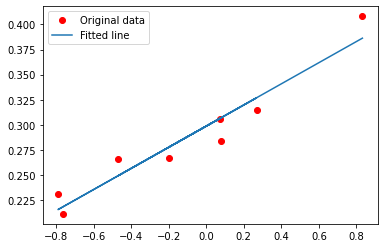

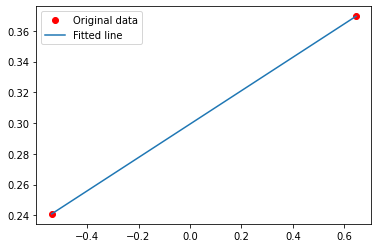

2.9616252943509556e-07


In [ ]:
# new_[0] 을 test set으로 가정! 즉 new_x[1~4]를 training set으로 사용

# x 트레이닝 셋/ 테스트 셋 인덱싱
x_data_20_test = x_data_ten[2:4]
x_data_20_training = np.append(x_data_ten[0:2],x_data_ten[4:])


# y 트레이닝 셋/ 테스트 셋 인덱싱
y_data_20_test = y_data_ten[2:4]
y_data_20_training = np.append(y_data_ten[0:2],y_data_ten[4:])


# 트레이닝 데이터를 1차원에서 2차원으로 변경

if len(x_data_20_training.shape)==1 and len(y_data_20_training.shape)==1:
  x_data_20_training = np.expand_dims(x_data_20_training, axis=-1) #마지막 axis를 추가하여 차원을 늘려줌
  y_data_20_training = np.expand_dims(y_data_20_training, axis=-1)

#경사하감법을 이용하여 트레이닝 셋을 학습
input_size = 1
output_size = 1
num_epochs = 100
learning_rate = 0.1
model20 = nn.Linear(input_size, output_size) 
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model20.parameters(), lr=learning_rate)  

for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    
    inputs_20_training = torch.from_numpy(x_data_20_training)
    targets_20_training = torch.from_numpy(y_data_20_training)


    # Predict outputs with the linear model.
    outputs_20_training = model20(inputs_20_training)
    loss_20_training = criterion(outputs_20_training, targets_20_training)


    # compute gradients and update
    optimizer.zero_grad()
    loss_20_training.backward() #미분

    optimizer.step()
    
    # if (epoch+1) % 5 == 0:
    #     print ('Epoch [{}/{}], Loss_1_training: {:.4f}'.format(epoch+1, num_epochs, loss_1_training.item()))

predicted_20_training = model20(torch.from_numpy(x_data_20_training)).detach().numpy()
plt.plot(x_data_20_training, y_data_20_training, 'ro', label='Original data')
plt.plot(x_data_20_training, predicted_20_training, label='Fitted line')
plt.legend()
plt.show()


#-----------------------------------------
# 같은 모델에 테스트 셋을 대입
# 테스트 셋 차원 변경


if len(x_data_20_test.shape)==1 and len(y_data_20_test.shape)==1:
  x_data_20_test = np.expand_dims(x_data_20_test, axis=-1) #마지막 axis를 추가하여 차원을 늘려줌
  y_data_20_test = np.expand_dims(y_data_20_test, axis=-1)

test20=[]# 테스트 셋의 loss를 담을 배열

for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs_20_test = torch.from_numpy(x_data_20_test)
    targets_20_test = torch.from_numpy(y_data_20_test)



    # Predict outputs with the linear model.
    outputs_20_test = model20(inputs_20_test)
    loss_20_test = criterion(outputs_20_test, targets_20_test)
    test20.append(loss_20_test.item())


    # compute gradients and update
    optimizer.zero_grad()
    loss_20_test.backward() #미분
    optimizer.step()
    
    # if (epoch+1) % 5 == 0:
    #     print ('Epoch [{}/{}], Loss_1_test: {:.4f}'.format(epoch+1, num_epochs, loss_1_test.item()))
predicted_20_test = model20(torch.from_numpy(x_data_20_test)).detach().numpy()
plt.plot(x_data_20_test, y_data_20_test, 'ro', label='Original data')
plt.plot(x_data_20_test, predicted_20_test, label='Fitted line')
plt.legend()
plt.show()

# test10 의 평균
print(np.mean(test20))

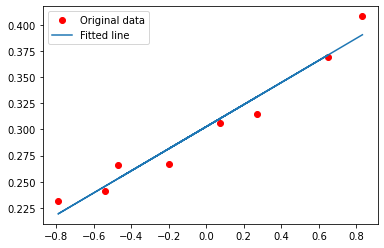

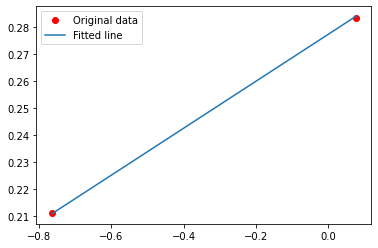

2.726017161833738e-05


In [ ]:
# new_[0] 을 test set으로 가정! 즉 new_x[1~4]를 training set으로 사용

# x 트레이닝 셋/ 테스트 셋 인덱싱
x_data_30_test = x_data_ten[4:6]
x_data_30_training = np.append(x_data_ten[0:4],x_data_ten[6:])


# y 트레이닝 셋/ 테스트 셋 인덱싱
y_data_30_test = y_data_ten[4:6]
y_data_30_training = np.append(y_data_ten[0:4],y_data_ten[6:])


# 트레이닝 데이터를 1차원에서 2차원으로 변경

if len(x_data_30_training.shape)==1 and len(y_data_30_training.shape)==1:
  x_data_30_training = np.expand_dims(x_data_30_training, axis=-1) #마지막 axis를 추가하여 차원을 늘려줌
  y_data_30_training = np.expand_dims(y_data_30_training, axis=-1)

#경사하감법을 이용하여 트레이닝 셋을 학습
input_size = 1
output_size = 1
num_epochs = 100
learning_rate = 0.1
model30 = nn.Linear(input_size, output_size) 
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model30.parameters(), lr=learning_rate)  

for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    
    inputs_30_training = torch.from_numpy(x_data_30_training)
    targets_30_training = torch.from_numpy(y_data_30_training)


    # Predict outputs with the linear model.
    outputs_30_training = model30(inputs_30_training)
    loss_30_training = criterion(outputs_30_training, targets_30_training)


    # compute gradients and update
    optimizer.zero_grad()
    loss_30_training.backward() #미분

    optimizer.step()
    
    # if (epoch+1) % 5 == 0:
    #     print ('Epoch [{}/{}], Loss_1_training: {:.4f}'.format(epoch+1, num_epochs, loss_1_training.item()))

predicted_30_training = model30(torch.from_numpy(x_data_30_training)).detach().numpy()
plt.plot(x_data_30_training, y_data_30_training, 'ro', label='Original data')
plt.plot(x_data_30_training, predicted_30_training, label='Fitted line')
plt.legend()
plt.show()


#-----------------------------------------
# 같은 모델에 테스트 셋을 대입
# 테스트 셋 차원 변경


if len(x_data_30_test.shape)==1 and len(y_data_30_test.shape)==1:
  x_data_30_test = np.expand_dims(x_data_30_test, axis=-1) #마지막 axis를 추가하여 차원을 늘려줌
  y_data_30_test = np.expand_dims(y_data_30_test, axis=-1)

test30=[]# 테스트 셋의 loss를 담을 배열

for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs_30_test = torch.from_numpy(x_data_30_test)
    targets_30_test = torch.from_numpy(y_data_30_test)



    # Predict outputs with the linear model.
    outputs_30_test = model30(inputs_30_test)
    loss_30_test = criterion(outputs_30_test, targets_30_test)
    test30.append(loss_30_test.item())


    # compute gradients and update
    optimizer.zero_grad()
    loss_30_test.backward() #미분
    optimizer.step()
    
    # if (epoch+1) % 5 == 0:
    #     print ('Epoch [{}/{}], Loss_1_test: {:.4f}'.format(epoch+1, num_epochs, loss_1_test.item()))
predicted_30_test = model30(torch.from_numpy(x_data_30_test)).detach().numpy()
plt.plot(x_data_30_test, y_data_30_test, 'ro', label='Original data')
plt.plot(x_data_30_test, predicted_30_test, label='Fitted line')
plt.legend()
plt.show()

# test10 의 평균
print(np.mean(test30))

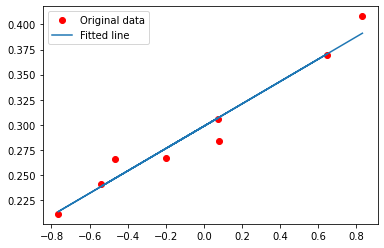

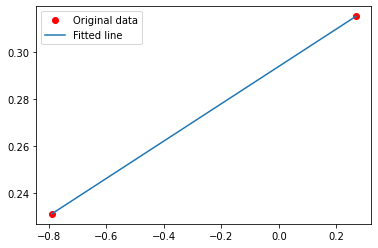

2.725627611101622e-05


In [ ]:
# new_[0] 을 test set으로 가정! 즉 new_x[1~4]를 training set으로 사용

# x 트레이닝 셋/ 테스트 셋 인덱싱
x_data_40_test = x_data_ten[6:8]
x_data_40_training = np.append(x_data_ten[0:6],x_data_ten[8:])


# y 트레이닝 셋/ 테스트 셋 인덱싱
y_data_40_test = y_data_ten[6:8]
y_data_40_training = np.append(y_data_ten[0:6],y_data_ten[8:])


# 트레이닝 데이터를 1차원에서 2차원으로 변경

if len(x_data_40_training.shape)==1 and len(y_data_40_training.shape)==1:
  x_data_40_training = np.expand_dims(x_data_40_training, axis=-1) #마지막 axis를 추가하여 차원을 늘려줌
  y_data_40_training = np.expand_dims(y_data_40_training, axis=-1)

#경사하감법을 이용하여 트레이닝 셋을 학습
input_size = 1
output_size = 1
num_epochs = 100
learning_rate = 0.1
model40 = nn.Linear(input_size, output_size) 
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model40.parameters(), lr=learning_rate)  

for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    
    inputs_40_training = torch.from_numpy(x_data_40_training)
    targets_40_training = torch.from_numpy(y_data_40_training)


    # Predict outputs with the linear model.
    outputs_40_training = model40(inputs_40_training)
    loss_40_training = criterion(outputs_40_training, targets_40_training)


    # compute gradients and update
    optimizer.zero_grad()
    loss_40_training.backward() #미분

    optimizer.step()
    
    # if (epoch+1) % 5 == 0:
    #     print ('Epoch [{}/{}], Loss_1_training: {:.4f}'.format(epoch+1, num_epochs, loss_1_training.item()))

predicted_40_training = model40(torch.from_numpy(x_data_40_training)).detach().numpy()
plt.plot(x_data_40_training, y_data_40_training, 'ro', label='Original data')
plt.plot(x_data_40_training, predicted_40_training, label='Fitted line')
plt.legend()
plt.show()


#-----------------------------------------
# 같은 모델에 테스트 셋을 대입
# 테스트 셋 차원 변경


if len(x_data_40_test.shape)==1 and len(y_data_40_test.shape)==1:
  x_data_40_test = np.expand_dims(x_data_40_test, axis=-1) #마지막 axis를 추가하여 차원을 늘려줌
  y_data_40_test = np.expand_dims(y_data_40_test, axis=-1)

test40=[]# 테스트 셋의 loss를 담을 배열

for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs_40_test = torch.from_numpy(x_data_40_test)
    targets_40_test = torch.from_numpy(y_data_40_test)



    # Predict outputs with the linear model.
    outputs_40_test = model40(inputs_40_test)
    loss_40_test = criterion(outputs_40_test, targets_40_test)
    test40.append(loss_40_test.item())


    # compute gradients and update
    optimizer.zero_grad()
    loss_40_test.backward() #미분
    optimizer.step()
    
    # if (epoch+1) % 5 == 0:
    #     print ('Epoch [{}/{}], Loss_1_test: {:.4f}'.format(epoch+1, num_epochs, loss_1_test.item()))
predicted_40_test = model40(torch.from_numpy(x_data_40_test)).detach().numpy()
plt.plot(x_data_40_test, y_data_40_test, 'ro', label='Original data')
plt.plot(x_data_40_test, predicted_40_test, label='Fitted line')
plt.legend()
plt.show()

# test40 의 평균
print(np.mean(test40))

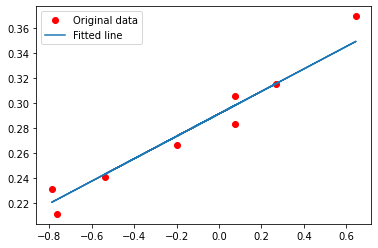

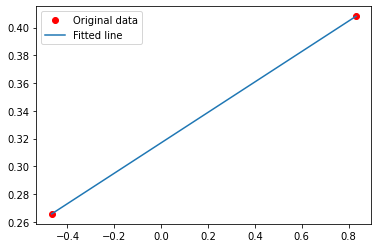

2.8978021212320294e-05


In [ ]:
# new_[0] 을 test set으로 가정! 즉 new_x[1~4]를 training set으로 사용

# x 트레이닝 셋/ 테스트 셋 인덱싱
x_data_50_test = x_data_ten[8:]
x_data_50_training = x_data_ten[0:8]


# y 트레이닝 셋/ 테스트 셋 인덱싱
y_data_50_test = y_data_ten[8:]
y_data_50_training = y_data_ten[0:8]


# 트레이닝 데이터를 1차원에서 2차원으로 변경

if len(x_data_50_training.shape)==1 and len(y_data_50_training.shape)==1:
  x_data_50_training = np.expand_dims(x_data_50_training, axis=-1) #마지막 axis를 추가하여 차원을 늘려줌
  y_data_50_training = np.expand_dims(y_data_50_training, axis=-1)

#경사하감법을 이용하여 트레이닝 셋을 학습
input_size = 1
output_size = 1
num_epochs = 100
learning_rate = 0.1
model50 = nn.Linear(input_size, output_size) 
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model50.parameters(), lr=learning_rate)  

for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    
    inputs_50_training = torch.from_numpy(x_data_50_training)
    targets_50_training = torch.from_numpy(y_data_50_training)


    # Predict outputs with the linear model.
    outputs_50_training = model50(inputs_50_training)
    loss_50_training = criterion(outputs_50_training, targets_50_training)


    # compute gradients and update
    optimizer.zero_grad()
    loss_50_training.backward() #미분

    optimizer.step()
    
    # if (epoch+1) % 5 == 0:
    #     print ('Epoch [{}/{}], Loss_1_training: {:.4f}'.format(epoch+1, num_epochs, loss_1_training.item()))

predicted_50_training = model50(torch.from_numpy(x_data_50_training)).detach().numpy()
plt.plot(x_data_50_training, y_data_50_training, 'ro', label='Original data')
plt.plot(x_data_50_training, predicted_50_training, label='Fitted line')
plt.legend()
plt.show()


#-----------------------------------------
# 같은 모델에 테스트 셋을 대입
# 테스트 셋 차원 변경


if len(x_data_50_test.shape)==1 and len(y_data_50_test.shape)==1:
  x_data_50_test = np.expand_dims(x_data_50_test, axis=-1) #마지막 axis를 추가하여 차원을 늘려줌
  y_data_50_test = np.expand_dims(y_data_50_test, axis=-1)

test50=[]# 테스트 셋의 loss를 담을 배열

for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs_50_test = torch.from_numpy(x_data_50_test)
    targets_50_test = torch.from_numpy(y_data_50_test)



    # Predict outputs with the linear model.
    outputs_50_test = model50(inputs_50_test)
    loss_50_test = criterion(outputs_50_test, targets_50_test)
    test50.append(loss_50_test.item())


    # compute gradients and update
    optimizer.zero_grad()
    loss_50_test.backward() #미분
    optimizer.step()
    
    # if (epoch+1) % 5 == 0:
    #     print ('Epoch [{}/{}], Loss_1_test: {:.4f}'.format(epoch+1, num_epochs, loss_1_test.item()))
predicted_50_test = model50(torch.from_numpy(x_data_50_test)).detach().numpy()
plt.plot(x_data_50_test, y_data_50_test, 'ro', label='Original data')
plt.plot(x_data_50_test, predicted_50_test, label='Fitted line')
plt.legend()
plt.show()

# test40 의 평균
print(np.mean(test50))

In [ ]:
mmm = np.mean(test10)+np.mean(test20)+np.mean(test30)+np.mean(test40)+np.mean(test50)
print(mmm/5)

2.0825538126005627e-05


### Gradient Descent로 Linear Regression (K-fold cross validation)

In [ ]:
file = open('/content/drive/MyDrive/Colab Notebooks/data/regression_data.txt','r')  # open the file with read-only
text = file.readlines()  # read all line texts
file.close()  # close the file

x_data = []
y_data = []

# convert to float
for s in text:
    data = s.split()
    x_data.append(float(data[0]))
    y_data.append(float(data[1]))    

import numpy as np
# convert to numpy-array
x_data = np.asarray(x_data, dtype=np.float32)
y_data = np.asarray(y_data, dtype=np.float32)

print("shape of input data: ", x_data.shape)
print("shape of output data: ", y_data.shape)
# 20 씩 나누기

# 즉 20 개 씩 5개를 만들어서 5fold를 만든다 
# 0~4 순서 로 test set을 가정함 

shape of input data:  (100,)
shape of output data:  (100,)
20 20 20 20 20
[ 0.07344105 -0.66713613  0.6110256  -0.9845775  -0.8837434  -0.1285476
  0.22099136  0.85341275  0.62423694 -0.9884482  -0.19720629  0.4089211
  0.3083344  -0.7683663   0.5810094  -0.6130423   0.3708078   0.26891464
  0.06920309  0.25825354]


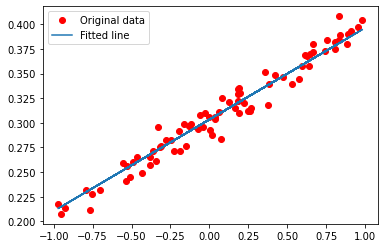

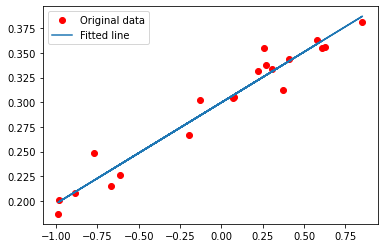

0.00018055484237265772


In [ ]:
# new_[0] 을 test set으로 가정! 즉 new_x[1~4]를 training set으로 사용

# x 트레이닝 셋/ 테스트 셋 인덱싱
x_data_1_test = x_data[:20]
x_data_1_training = x_data[20:]

# y 트레이닝 셋/ 테스트 셋 인덱싱
y_data_1_test = y_data[:20]
y_data_1_training = y_data[20:]


# 트레이닝 데이터를 1차원에서 2차원으로 변경

if len(x_data_1_training.shape)==1 and len(y_data_1_training.shape)==1:
  x_data_1_training = np.expand_dims(x_data_1_training, axis=-1) #마지막 axis를 추가하여 차원을 늘려줌
  y_data_1_training = np.expand_dims(y_data_1_training, axis=-1)

#경사하감법을 이용하여 트레이닝 셋을 학습
input_size = 1
output_size = 1
num_epochs = 100
learning_rate = 0.1
model1 = nn.Linear(input_size, output_size) 
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model1.parameters(), lr=learning_rate)  

for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    
    inputs_1_training = torch.from_numpy(x_data_1_training)
    targets_1_training = torch.from_numpy(y_data_1_training)


    # Predict outputs with the linear model.
    outputs_1_training = model1(inputs_1_training)
    loss_1_training = criterion(outputs_1_training, targets_1_training)


    # compute gradients and update
    optimizer.zero_grad()
    loss_1_training.backward() #미분

    optimizer.step()
    
    # if (epoch+1) % 5 == 0:
    #     print ('Epoch [{}/{}], Loss_1_training: {:.4f}'.format(epoch+1, num_epochs, loss_1_training.item()))

predicted_1_training = model1(torch.from_numpy(x_data_1_training)).detach().numpy()
plt.plot(x_data_1_training, y_data_1_training, 'ro', label='Original data')
plt.plot(x_data_1_training, predicted_1_training, label='Fitted line')
plt.legend()
plt.show()


#-----------------------------------------
# 같은 모델에 테스트 셋을 대입
# 테스트 셋 차원 변경


if len(x_data_1_test.shape)==1 and len(y_data_1_test.shape)==1:
  x_data_1_test = np.expand_dims(x_data_1_test, axis=-1) #마지막 axis를 추가하여 차원을 늘려줌
  y_data_1_test = np.expand_dims(y_data_1_test, axis=-1)

test1=[]# 테스트 셋의 loss를 담을 배열

for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs_1_test = torch.from_numpy(x_data_1_test)
    targets_1_test = torch.from_numpy(y_data_1_test)



    # Predict outputs with the linear model.
    outputs_1_test = model1(inputs_1_test)
    loss_1_test = criterion(outputs_1_test, targets_1_test)
    test1.append(loss_1_test.item())


    # compute gradients and update
    optimizer.zero_grad()
    loss_1_test.backward() #미분
    optimizer.step()
    
    # if (epoch+1) % 5 == 0:
    #     print ('Epoch [{}/{}], Loss_1_test: {:.4f}'.format(epoch+1, num_epochs, loss_1_test.item()))
predicted_1_test = model1(torch.from_numpy(x_data_1_test)).detach().numpy()
plt.plot(x_data_1_test, y_data_1_test, 'ro', label='Original data')
plt.plot(x_data_1_test, predicted_1_test, label='Fitted line')
plt.legend()
plt.show()

# test1 의 평균
print(np.mean(test1))


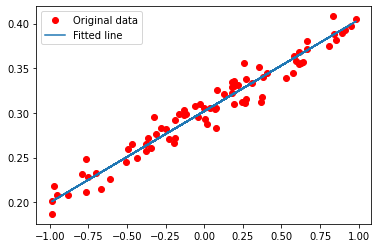

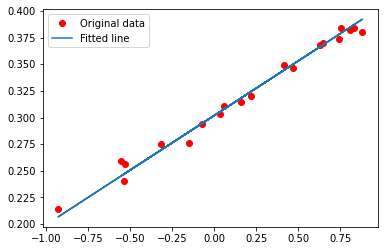

3.074499181821011e-05


In [ ]:
# new_[1] 을 test set으로 가정! 즉 new_x[0,2~4]를 training set으로 사용

# x 트레이닝 셋/ 테스트 셋 인덱싱
x_data_2_test = x_data[20:40]
x_data_2_training = np.append(x_data[0:20],x_data[40:])

# y 트레이닝 셋/ 테스트 셋 인덱싱
y_data_2_test = y_data[20:40]
y_data_2_training = np.append(y_data[0:20],y_data[40:])

# 트레이닝 데이터를 1차원에서 2차원으로 변경

if len(x_data_2_training.shape)==1 and len(y_data_2_training.shape)==1:
  x_data_2_training = np.expand_dims(x_data_2_training, axis=-1) #마지막 axis를 추가하여 차원을 늘려줌
  y_data_2_training = np.expand_dims(y_data_2_training, axis=-1)

#경사하감법을 이용하여 트레이닝 셋을 학습
input_size = 1
output_size = 1
num_epochs = 100
learning_rate = 0.1
model2 = nn.Linear(input_size, output_size) 
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model2.parameters(), lr=learning_rate)  

for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    
    inputs_2_training = torch.from_numpy(x_data_2_training)
    targets_2_training = torch.from_numpy(y_data_2_training)

    # Predict outputs with the linear model.
    outputs_2_training = model2(inputs_2_training)
    loss_2_training = criterion(outputs_2_training, targets_2_training)
    
    # compute gradients and update
    optimizer.zero_grad()
    loss_2_training.backward() #미분
    optimizer.step()
    
    # if (epoch+1) % 5 == 0:
    #     print ('Epoch [{}/{}], Loss_2_training: {:.4f}'.format(epoch+1, num_epochs, loss_2_training.item()))

predicted_2_training = model2(torch.from_numpy(x_data_2_training)).detach().numpy()
plt.plot(x_data_2_training, y_data_2_training, 'ro', label='Original data')
plt.plot(x_data_2_training, predicted_2_training, label='Fitted line')
plt.legend()
plt.show()
#-----------------------------------------
# 같은 모델에 테스트 셋을 대입
# 테스트 셋 차원 변경


if len(x_data_2_test.shape)==1 and len(y_data_2_test.shape)==1:
  x_data_2_test = np.expand_dims(x_data_2_test, axis=-1) #마지막 axis를 추가하여 차원을 늘려줌
  y_data_2_test = np.expand_dims(y_data_2_test, axis=-1)
test2=[]# 테스트 셋의 loss를 담을 배열
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs_2_test = torch.from_numpy(x_data_2_test)
    targets_2_test = torch.from_numpy(y_data_2_test)

    # Predict outputs with the linear model.
    outputs_2_test = model1(inputs_2_test)
    loss_2_test = criterion(outputs_2_test, targets_2_test)
    test2.append(loss_2_test.item())
    # compute gradients and update
    optimizer.zero_grad()
    loss_2_test.backward() #미분
    optimizer.step()
    
    # if (epoch+1) % 5 == 0:
    #     print ('Epoch [{}/{}], Loss_2_test: {:.4f}'.format(epoch+1, num_epochs, loss_2_test.item()))
predicted_2_test = model2(torch.from_numpy(x_data_2_test)).detach().numpy()
plt.plot(x_data_2_test, y_data_2_test, 'ro', label='Original data')
plt.plot(x_data_2_test, predicted_2_test, label='Fitted line')
plt.legend()
plt.show()

# test2 의 평균

print(np.mean(test2))

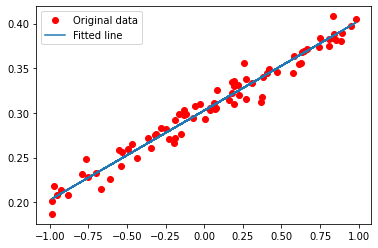

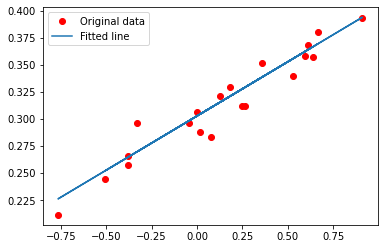

0.00016699761908967048


In [ ]:
# new_[2] 을 test set으로 가정! 즉 new_x[0~1,3~4]를 training set으로 사용

# x 트레이닝 셋/ 테스트 셋 인덱싱
x_data_3_test = x_data[40:60]
x_data_3_training = np.append(x_data[0:40],x_data[60:])

# y 트레이닝 셋/ 테스트 셋 인덱싱
y_data_3_test = y_data[40:60]
y_data_3_training = np.append(y_data[0:40],y_data[60:])

# 트레이닝 데이터를 1차원에서 2차원으로 변경

if len(x_data_3_training.shape)==1 and len(y_data_3_training.shape)==1:
  x_data_3_training = np.expand_dims(x_data_3_training, axis=-1) #마지막 axis를 추가하여 차원을 늘려줌
  y_data_3_training = np.expand_dims(y_data_3_training, axis=-1)

#경사하감법을 이용하여 트레이닝 셋을 학습
input_size = 1
output_size = 1
num_epochs = 100
learning_rate = 0.1
model3 = nn.Linear(input_size, output_size) 
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model3.parameters(), lr=learning_rate)  

for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    
    inputs_3_training = torch.from_numpy(x_data_3_training)
    targets_3_training = torch.from_numpy(y_data_3_training)

    # Predict outputs with the linear model.
    outputs_3_training = model3(inputs_3_training)
    loss_3_training = criterion(outputs_3_training, targets_3_training)
    
    # compute gradients and update
    optimizer.zero_grad()
    loss_3_training.backward() #미분
    optimizer.step()
    
    # if (epoch+1) % 5 == 0:
    #     print ('Epoch [{}/{}], Loss_3_training: {:.4f}'.format(epoch+1, num_epochs, loss_3_training.item()))

predicted_3_training = model3(torch.from_numpy(x_data_3_training)).detach().numpy()
plt.plot(x_data_3_training, y_data_3_training, 'ro', label='Original data')
plt.plot(x_data_3_training, predicted_3_training, label='Fitted line')
plt.legend()
plt.show()
#-----------------------------------------
# 같은 모델에 테스트 셋을 대입
# 테스트 셋 차원 변경


if len(x_data_3_test.shape)==1 and len(y_data_3_test.shape)==1:
  x_data_3_test = np.expand_dims(x_data_3_test, axis=-1) #마지막 axis를 추가하여 차원을 늘려줌
  y_data_3_test = np.expand_dims(y_data_3_test, axis=-1)
test3=[]# 테스트 셋의 loss를 담을 배열
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs_3_test = torch.from_numpy(x_data_3_test)
    targets_3_test = torch.from_numpy(y_data_3_test)

    # Predict outputs with the linear model.
    outputs_3_test = model1(inputs_3_test)
    loss_3_test = criterion(outputs_3_test, targets_3_test)
    test3.append(loss_3_test.item())
    # compute gradients and update
    optimizer.zero_grad()
    loss_3_test.backward() #미분
    optimizer.step()
    
    # if (epoch+1) % 5 == 0:
    #     print ('Epoch [{}/{}], Loss_3_test: {:.4f}'.format(epoch+1, num_epochs, loss_3_test.item()))
    
predicted_3_test = model3(torch.from_numpy(x_data_3_test)).detach().numpy()
plt.plot(x_data_3_test, y_data_3_test, 'ro', label='Original data')
plt.plot(x_data_3_test, predicted_3_test, label='Fitted line')
plt.legend()
plt.show()

# test2 의 평균

print(np.mean(test3))

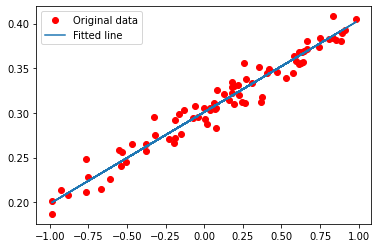

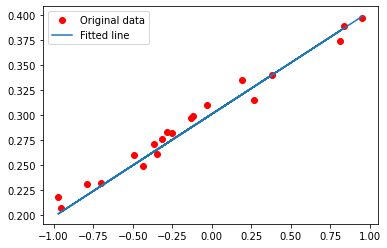

5.638468428514898e-05


In [ ]:
# new_[3] 을 test set으로 가정! 즉 new_x[0~2,4]를 training set으로 사용

# x 트레이닝 셋/ 테스트 셋 인덱싱
x_data_4_test = x_data[60:80]
x_data_4_training = np.append(x_data[0:60],x_data[80:])

# y 트레이닝 셋/ 테스트 셋 인덱싱
y_data_4_test = y_data[60:80]
y_data_4_training = np.append(y_data[0:60],y_data[80:])

# 트레이닝 데이터를 1차원에서 2차원으로 변경

if len(x_data_4_training.shape)==1 and len(y_data_4_training.shape)==1:
  x_data_4_training = np.expand_dims(x_data_4_training, axis=-1) #마지막 axis를 추가하여 차원을 늘려줌
  y_data_4_training = np.expand_dims(y_data_4_training, axis=-1)

#경사하감법을 이용하여 트레이닝 셋을 학습
input_size = 1
output_size = 1
num_epochs = 100
learning_rate = 0.1
model4 = nn.Linear(input_size, output_size) 
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model4.parameters(), lr=learning_rate)  

for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    
    inputs_4_training = torch.from_numpy(x_data_4_training)
    targets_4_training = torch.from_numpy(y_data_4_training)

    # Predict outputs with the linear model.
    outputs_4_training = model4(inputs_4_training)
    loss_4_training = criterion(outputs_4_training, targets_4_training)
    
    # compute gradients and update
    optimizer.zero_grad()
    loss_4_training.backward() #미분
    optimizer.step()
    
    # if (epoch+1) % 5 == 0:
    #     print ('Epoch [{}/{}], Loss_4_training: {:.4f}'.format(epoch+1, num_epochs, loss_4_training.item()))

predicted_4_training = model4(torch.from_numpy(x_data_4_training)).detach().numpy()
plt.plot(x_data_4_training, y_data_4_training, 'ro', label='Original data')
plt.plot(x_data_4_training, predicted_4_training, label='Fitted line')
plt.legend()
plt.show()
#-----------------------------------------
# 같은 모델에 테스트 셋을 대입
# 테스트 셋 차원 변경


if len(x_data_4_test.shape)==1 and len(y_data_4_test.shape)==1:
  x_data_4_test = np.expand_dims(x_data_4_test, axis=-1) #마지막 axis를 추가하여 차원을 늘려줌
  y_data_4_test = np.expand_dims(y_data_4_test, axis=-1)
test4=[]# 테스트 셋의 loss를 담을 배열
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs_4_test = torch.from_numpy(x_data_4_test)
    targets_4_test = torch.from_numpy(y_data_4_test)

    # Predict outputs with the linear model.
    outputs_4_test = model1(inputs_4_test)
    loss_4_test = criterion(outputs_4_test, targets_4_test)
    test4.append(loss_4_test.item())
    # compute gradients and update
    optimizer.zero_grad()
    loss_4_test.backward() #미분
    optimizer.step()
    
    # if (epoch+1) % 5 == 0:
    #     print ('Epoch [{}/{}], Loss_4_test: {:.4f}'.format(epoch+1, num_epochs, loss_4_test.item()))
    
predicted_4_test = model4(torch.from_numpy(x_data_4_test)).detach().numpy()
plt.plot(x_data_4_test, y_data_4_test, 'ro', label='Original data')
plt.plot(x_data_4_test, predicted_4_test, label='Fitted line')
plt.legend()
plt.show()

# test4 의 평균

print(np.mean(test4))

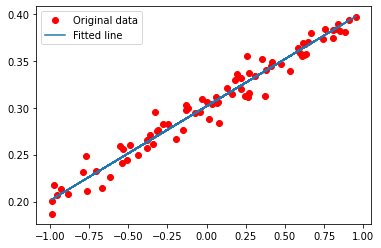

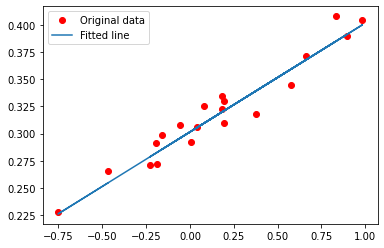

0.0001353728584945202


In [ ]:
# new_[4] 을 test set으로 가정! 즉 new_x[0~3]를 training set으로 사용

# x 트레이닝 셋/ 테스트 셋 인덱싱
x_data_5_test = x_data[80:]
x_data_5_training = x_data[:80]

# y 트레이닝 셋/ 테스트 셋 인덱싱
y_data_5_test = y_data[80:]
y_data_5_training = y_data[:80]

# 트레이닝 데이터를 1차원에서 2차원으로 변경

if len(x_data_5_training.shape)==1 and len(y_data_5_training.shape)==1:
  x_data_5_training = np.expand_dims(x_data_5_training, axis=-1) #마지막 axis를 추가하여 차원을 늘려줌
  y_data_5_training = np.expand_dims(y_data_5_training, axis=-1)

#경사하감법을 이용하여 트레이닝 셋을 학습
input_size = 1
output_size = 1
num_epochs = 100
learning_rate = 0.1
model5 = nn.Linear(input_size, output_size) 
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model5.parameters(), lr=learning_rate)  

for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    
    inputs_5_training = torch.from_numpy(x_data_5_training)
    targets_5_training = torch.from_numpy(y_data_5_training)

    # Predict outputs with the linear model.
    outputs_5_training = model5(inputs_5_training)
    loss_5_training = criterion(outputs_5_training, targets_5_training)
    
    # compute gradients and update
    optimizer.zero_grad()
    loss_5_training.backward() #미분
    optimizer.step()
    
    # if (epoch+1) % 5 == 0:
    #     print ('Epoch [{}/{}], Loss_5_training: {:.4f}'.format(epoch+1, num_epochs, loss_5_training.item()))

predicted_5_training = model5(torch.from_numpy(x_data_5_training)).detach().numpy()
plt.plot(x_data_5_training, y_data_5_training, 'ro', label='Original data')
plt.plot(x_data_5_training, predicted_5_training, label='Fitted line')
plt.legend()
plt.show()
#-----------------------------------------
# 같은 모델에 테스트 셋을 대입
# 테스트 셋 차원 변경


if len(x_data_5_test.shape)==1 and len(y_data_5_test.shape)==1:
  x_data_5_test = np.expand_dims(x_data_5_test, axis=-1) #마지막 axis를 추가하여 차원을 늘려줌
  y_data_5_test = np.expand_dims(y_data_5_test, axis=-1)
test5=[]# 테스트 셋의 loss를 담을 배열
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs_5_test = torch.from_numpy(x_data_5_test)
    targets_5_test = torch.from_numpy(y_data_5_test)

    # Predict outputs with the linear model.
    outputs_5_test = model1(inputs_5_test)
    loss_5_test = criterion(outputs_5_test, targets_5_test)
    test5.append(loss_5_test.item())
    # compute gradients and update
    optimizer.zero_grad()
    loss_5_test.backward() #미분
    optimizer.step()
    
    # if (epoch+1) % 5 == 0:
    #     print ('Epoch [{}/{}], Loss_5_test: {:.4f}'.format(epoch+1, num_epochs, loss_5_test.item()))
    
predicted_5_test = model5(torch.from_numpy(x_data_5_test)).detach().numpy()
plt.plot(x_data_5_test, y_data_5_test, 'ro', label='Original data')
plt.plot(x_data_5_test, predicted_5_test, label='Fitted line')
plt.legend()
plt.show()

# test4 의 평균

print(np.mean(test5))

In [ ]:
#전체 loss의 평균
mm = np.mean(test1)+np.mean(test2)+np.mean(test3)+np.mean(test4)+np.mean(test5)
print(mm/5)

0.00011401099921204149


In [ ]:
#전체 loss와 1/10 loss의 비교
print(mm/5,mmm/5)

0.00011401099921204149 2.0825538126005627e-05
